In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('realtor-data.zip.csv')

# Display the first few rows of the dataset to understand its structure
df.head()


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [2]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / df.shape[0]) * 100

pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
}).sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
prev_sold_date,459101,50.731298
house_size,292886,32.364310
acre_lot,266642,29.464311
bed,129840,14.347500
bath,113884,12.584340
zip_code,204,0.022542
city,72,0.007956
price,71,0.007846
status,0,0.000000
state,0,0.000000


In [3]:
# Fill missing values for prev_sold_date with 'Unknown'
df['prev_sold_date'].fillna('Unknown', inplace=True)

# Fill missing values for house_size, acre_lot, bed, and bath with their respective medians
columns_to_fill = ['house_size', 'acre_lot', 'bed', 'bath']
for column in columns_to_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Drop rows with missing values in zip_code, city, and price
df.dropna(subset=['zip_code', 'city', 'price'], inplace=True)

# Check if all missing values have been addressed
remaining_missing = df.isnull().sum()

remaining_missing

status            0
bed               0
bath              0
acre_lot          0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
price             0
dtype: int64

In [4]:
# Check for and remove duplicate rows
initial_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
duplicates_removed = initial_row_count - df.shape[0]

duplicates_removed

794632

In [5]:
# Check data types
data_types = df.dtypes

# Check for any negative or unrealistic values in columns like price, house_size, bed, bath, and acre_lot
negative_values = {
    'price': df[df['price'] <= 0].shape[0],
    'house_size': df[df['house_size'] <= 0].shape[0],
    'bed': df[df['bed'] <= 0].shape[0],
    'bath': df[df['bath'] <= 0].shape[0],
    'acre_lot': df[df['acre_lot'] <= 0].shape[0]
}

data_types, negative_values

(status             object
 bed               float64
 bath              float64
 acre_lot          float64
 city               object
 state              object
 zip_code          float64
 house_size        float64
 prev_sold_date     object
 price             float64
 dtype: object,
 {'price': 4, 'house_size': 0, 'bed': 0, 'bath': 0, 'acre_lot': 88})

In [6]:
# Remove rows with negative or zero values in price and acre_lot
df = df[df['price'] > 0]
df = df[df['acre_lot'] > 0]

# Standardize text columns
df['status'] = df['status'].str.lower().str.strip()
df['city'] = df['city'].str.title().str.strip()
df['state'] = df['state'].str.upper().str.strip()

# Check the cleaned data
df.head()


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,PUERTO RICO,601.0,920.0,Unknown,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,PUERTO RICO,601.0,1527.0,Unknown,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,PUERTO RICO,795.0,748.0,Unknown,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,PUERTO RICO,731.0,1800.0,Unknown,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,PUERTO RICO,680.0,1650.0,Unknown,65000.0


In [7]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = "realtor-data-cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'realtor-data-cleaned.csv'

In [8]:
grouped_by_state = df.groupby('state')

stats_by_state = grouped_by_state['price'].agg(['mean', 'median', 'std', 'count'])

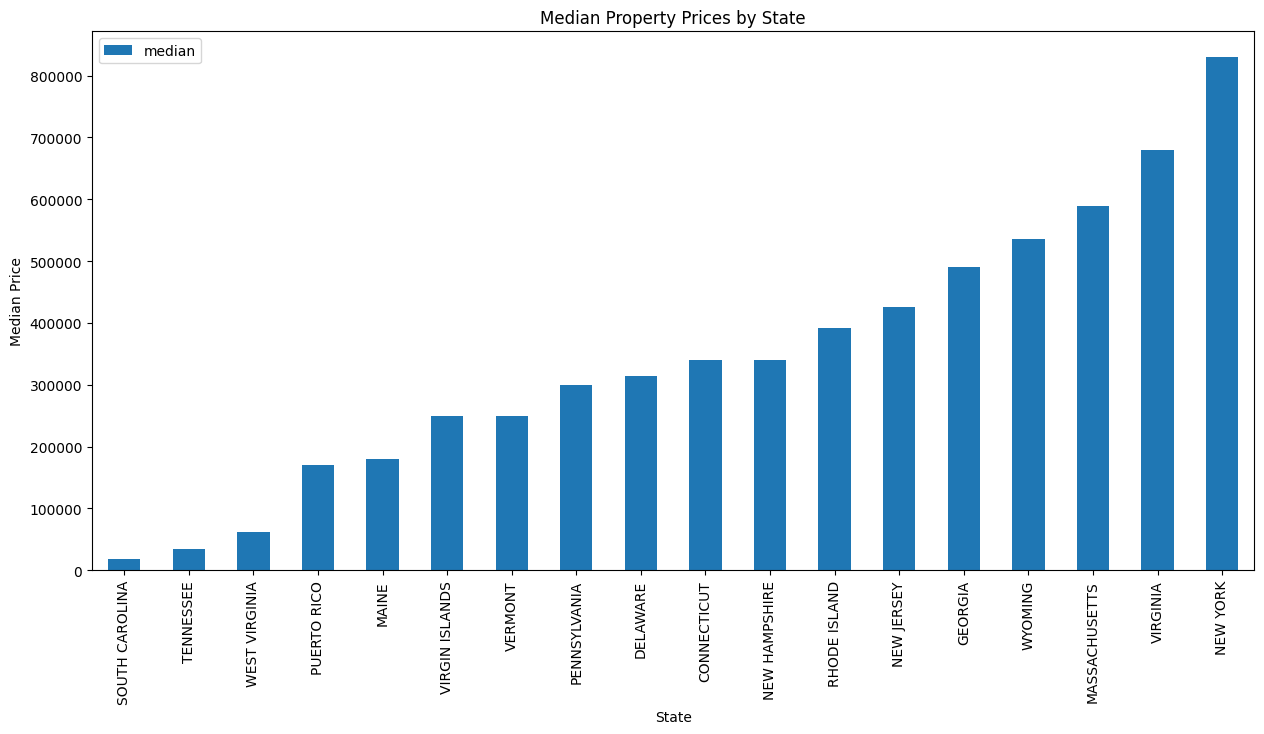

In [9]:
import matplotlib.pyplot as plt

stats_by_state.sort_values(by='median').plot(y='median', kind='bar', figsize=(15,7))
plt.title("Median Property Prices by State")
plt.ylabel("Median Price")
plt.xlabel("State")
plt.show()


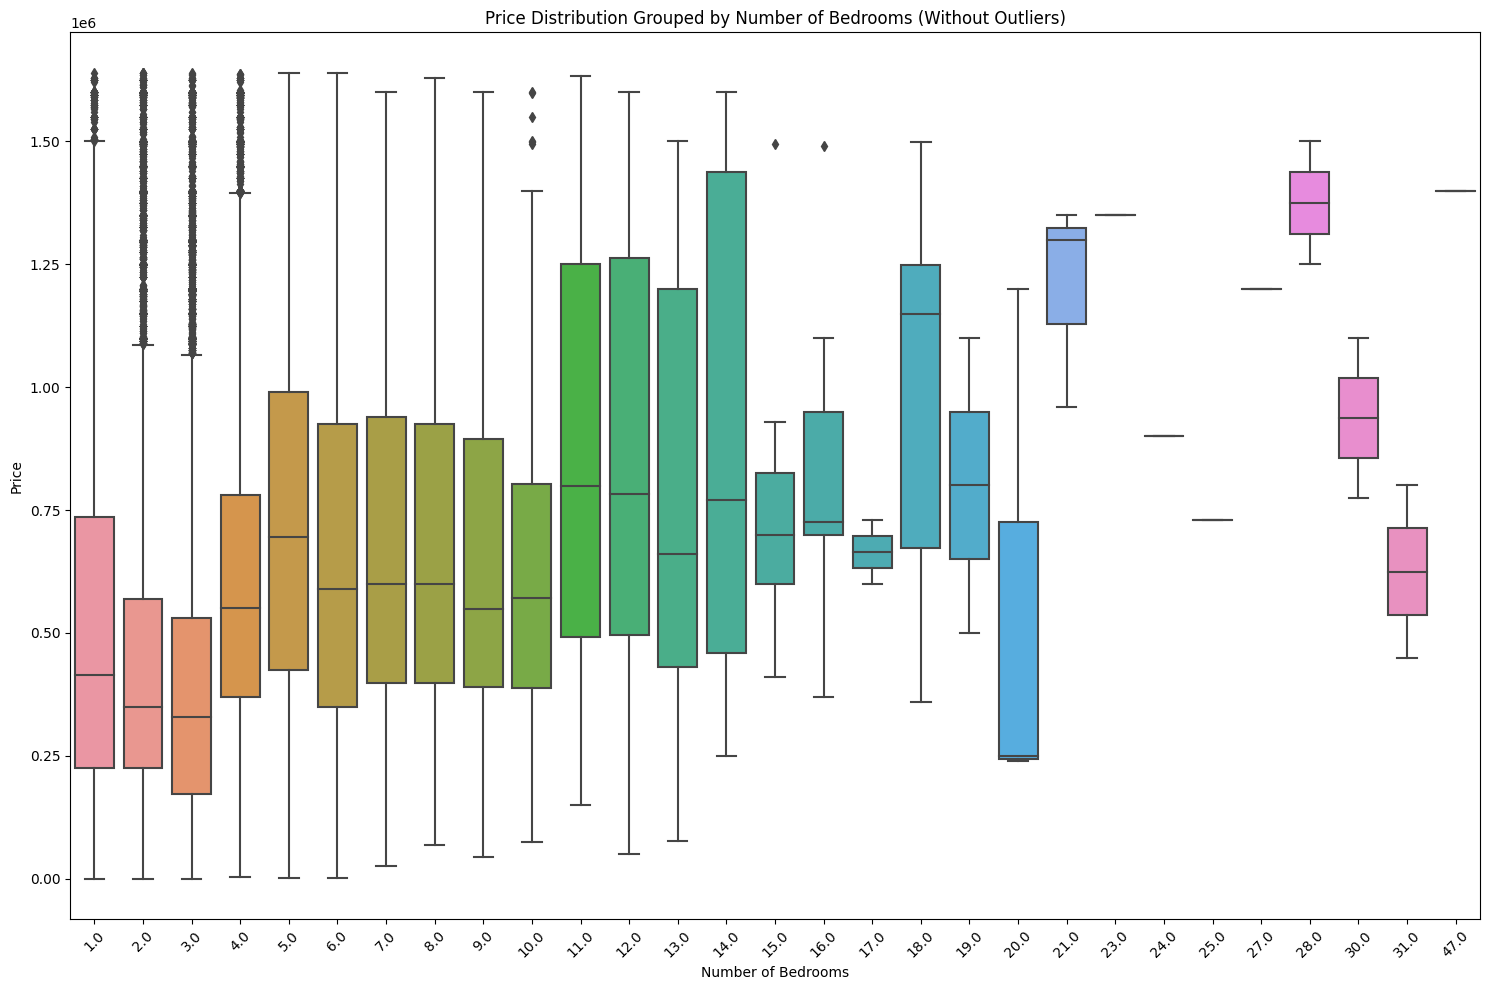

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Interquartile Range (IQR) for prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Generate the adjusted boxplot without outliers
plt.figure(figsize=(15, 10))
sns.boxplot(x='bed', y='price', data=df_no_outliers)
plt.title("Price Distribution Grouped by Number of Bedrooms (Without Outliers)")
plt.ylabel("Price")
plt.xlabel("Number of Bedrooms")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# Convert the 'prev_sold_date' column to datetime format
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

# Extract the year from the 'prev_sold_date' column
df['year'] = df['prev_sold_date'].dt.year

# Group by year and calculate the average price for each year
average_prices_by_year = df.groupby('year')['price'].mean()

import plotly.express as px

# Create an interactive line plot using Plotly
fig = px.line(average_prices_by_year.reset_index(), x='year', y='price', 
              labels={'price': 'Average Price ($)', 'year': 'Year'},
              title="Average Property Prices Over Time")

# Show the figure
fig.show()


C:\Users\rhaj1\AppData\Local\Temp\ipykernel_19200\2434056190.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')


In [12]:
# Calculate the average housing cost for each state
average_housing_costs = df.groupby('state')['price'].mean().sort_values(ascending=False)
average_housing_costs

state
NEW YORK          1.843789e+06
MASSACHUSETTS     9.820105e+05
VIRGIN ISLANDS    8.475163e+05
PUERTO RICO       6.794773e+05
CONNECTICUT       6.536282e+05
NEW JERSEY        6.237489e+05
RHODE ISLAND      5.749551e+05
VIRGINIA          5.555714e+05
WYOMING           5.350000e+05
NEW HAMPSHIRE     4.841709e+05
PENNSYLVANIA      4.463190e+05
VERMONT           4.369978e+05
GEORGIA           4.347530e+05
DELAWARE          3.722407e+05
MAINE             3.383781e+05
WEST VIRGINIA     6.250000e+04
TENNESSEE         3.490000e+04
SOUTH CAROLINA    1.895000e+04
Name: price, dtype: float64

In [13]:
# Mapping of state full names to their abbreviations
state_abbreviations = {
    'PUERTO RICO': 'PR',
    'VIRGIN ISLANDS': 'VI',
    'MASSACHUSETTS': 'MA',
    'CONNECTICUT': 'CT',
    'NEW HAMPSHIRE': 'NH',
    'VERMONT': 'VT',
    'NEW JERSEY': 'NJ',
    'NEW YORK': 'NY',
    'SOUTH CAROLINA': 'SC',
    'TENNESSEE': 'TN',
    'RHODE ISLAND': 'RI',
    'VIRGINIA': 'VA',
    'WYOMING': 'WY',
    'MAINE': 'ME',
    'GEORGIA': 'GA',
    'PENNSYLVANIA': 'PA',
    'WEST VIRGINIA': 'WV',
    'DELAWARE': 'DE'
}

# Replace state names with abbreviations in the average housing costs series
average_housing_costs = average_housing_costs.reset_index()
average_housing_costs['state'] = average_housing_costs['state'].map(state_abbreviations)

# Create the choropleth map with the updated state abbreviations
fig = px.choropleth(
    average_housing_costs,
    locations="state",
    locationmode="USA-states",
    color="price",
    hover_name="state",
    hover_data=["price"],
    scope="usa",
    color_continuous_scale="reds",
    labels={"price": "Average Housing Cost"},
    title="Average Housing Cost by State"
)

# Display the map
fig.show()


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset (replace with your file path)
data = pd.read_csv("realtor-data-cleaned.csv")

# Get 10% of the data as a sample
subset_data = data.sample(frac=0.1)

# Split the data into features and target
X = subset_data.drop('price', axis=1)  # assuming 'price' is the target column
y = subset_data['price']

# Identify columns with NaN values
nan_columns = X.columns[X.isnull().any()].tolist()

# Impute NaN values with the median (or mean/mode based on the data)
for col in nan_columns:
    median_value = X[col].median()
    X[col].fillna(median_value, inplace=True)

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}")


MSE: 3.753290495825267e+25, RMSE: 6126410446440.286, MAE: 1384792009360.8862, R^2: -2181215539155.4053


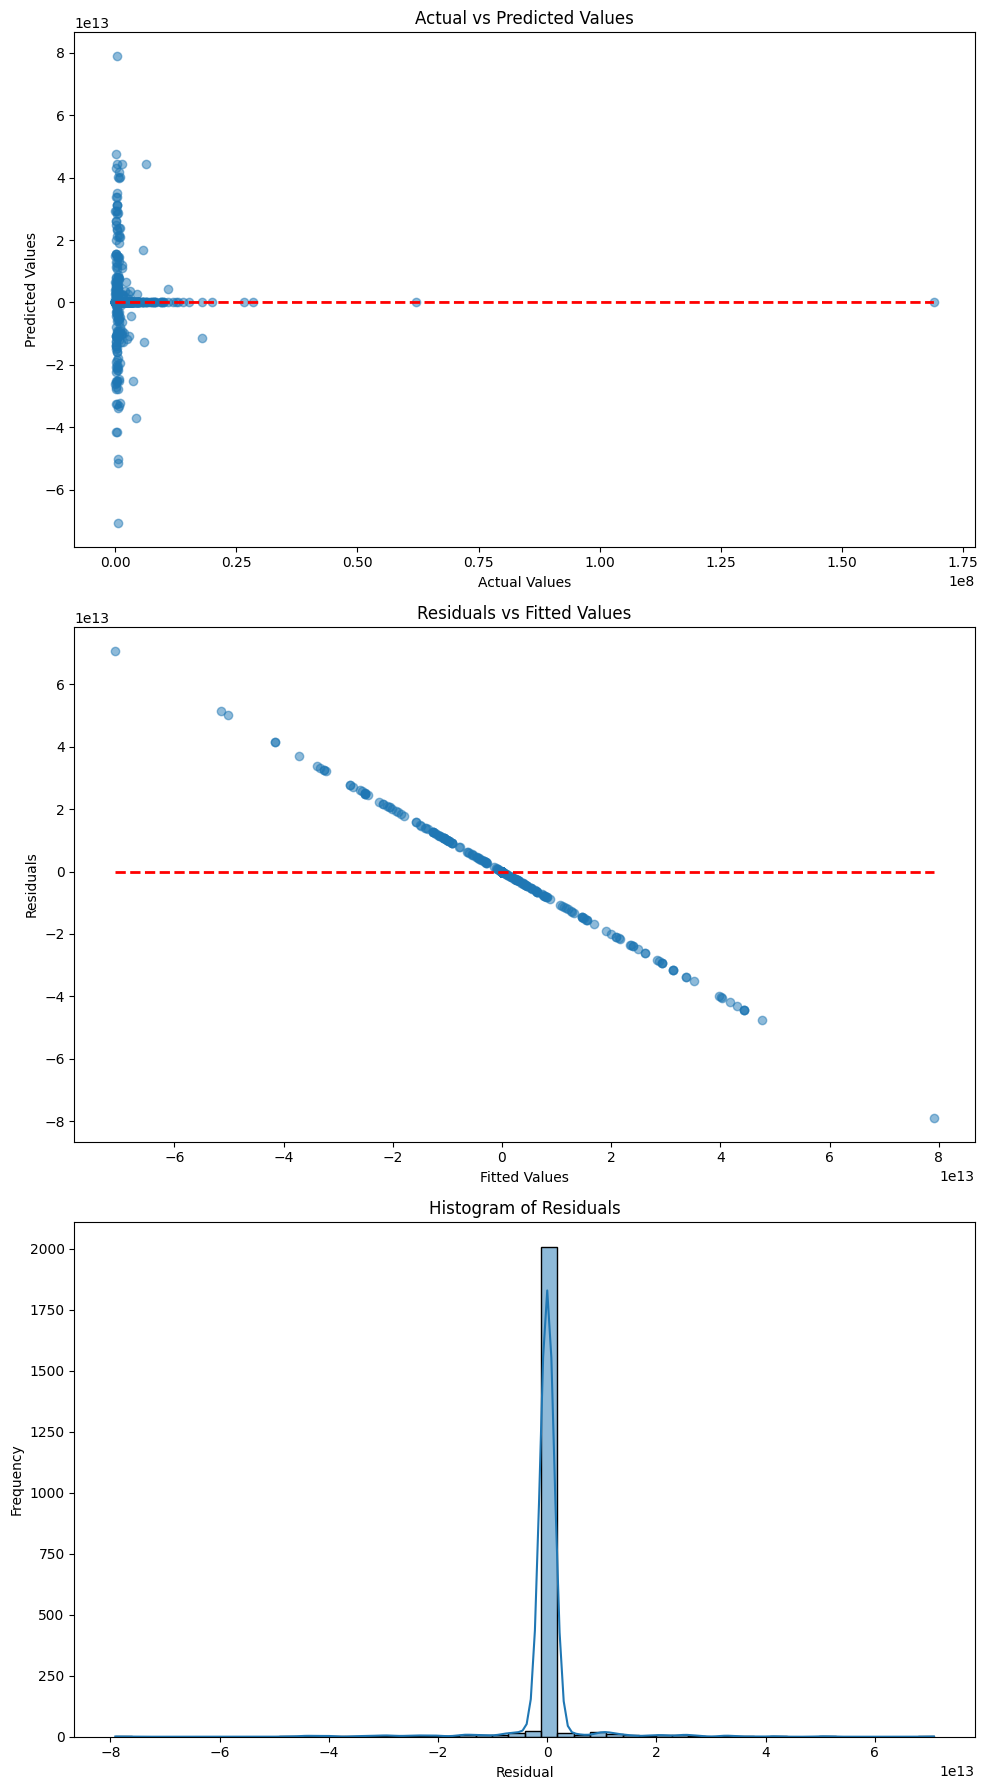

In [28]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# 1. Scatter plot of actual vs predicted values
axs[0].scatter(y_test, y_pred, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=2, color='red')
axs[0].set_title('Actual vs Predicted Values')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')

# 2. Residuals vs Fitted values plot
axs[1].scatter(y_pred, residuals, alpha=0.5)
axs[1].hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='--', lw=2)
axs[1].set_title('Residuals vs Fitted Values')
axs[1].set_xlabel('Fitted Values')
axs[1].set_ylabel('Residuals')

# 3. Histogram of residuals
sns.histplot(residuals, kde=True, ax=axs[2], bins=50)
axs[2].set_title('Histogram of Residuals')
axs[2].set_xlabel('Residual')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()